# Đồ án cuối kỳ:
(Cập nhật lần cuối: 04/07/2021)\
Nhóm 7
Thành viên:
 1. 18120062 - Nguyễn Hoàng Nam
 2. 18120096 - Trương Đại Triều

----

<h1>Bảng nội dung<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-thư-viện" data-toc-modified-id="Import-thư-viện-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import thư viện</a></span></li><li><span><a href="#Thu-thập-dữ-liệu" data-toc-modified-id="Thu-thập-dữ-liệu-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Thu thập dữ liệu</a></span></li><li><span><a href="#Khám-phá-dữ-liệu-&-tiền-xử-lý-dữ-liệu" data-toc-modified-id="Khám-phá-dữ-liệu-&-tiền-xử-lý-dữ-liệu-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Khám phá dữ liệu & tiền xử lý dữ liệu</a></span></li><li><span><a href="#Xác-định-câu-hỏi" data-toc-modified-id="Xác-định-câu-hỏi-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Xác định các câu hỏi</a></span></li><li><span><a href="#Nhìn-lại-quá-trình-làm-đồ-án" data-toc-modified-id="Nhìn-lại-quá-trình-làm-đồ-án-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Nhìn lại quá trình làm đồ án</a></span></li><li><span><a href="#Tài-liệu-tham-khảo" data-toc-modified-id="Tài-liệu-tham-khảo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Tài liệu tham khảo</a></span></li></ul></div>

---

# Import thư viện

Tải package [Pyecharts](https://pyecharts.org/#/en-us/)

In [2]:
!pip install pyecharts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math

from pyecharts.charts import Map,Geo,Line,Pie,Scatter
from pyecharts import options as opts
from pyecharts.globals import ThemeType

---

# Thu thập dữ liệu

## Dữ liệu của bạn là về chủ đề gì và bạn lấy từ nguồn nào?

Dữ liệu nói về việc tiêm vaccine phòng Covid-19, ở nhiều quốc gia được cập nhập thường xuyên. Dữ liệu được lưu tại 

(https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations)

##  Người ta có cho phép bạn dùng dữ liệu như này không?


License gốc được public trên trang [OurWorldInData](https://ourworldindata.org/coronavirus), các dataset được cấp quyền tái sử dụng tự do "[Reuse our work freely](https://ourworldindata.org/coronavirus#licence)". Đây là trang web cung cấp đầy đủ thông tin, về tình hình dịch bệnh, số ca nhiễm, tử vong, phân phối vacine trên từng quốc gia, vùng lãnh thổ. Trang web được phát triển bởi trường [Đại học Oxford, Anh](https://www.oxfordmartin.ox.ac.uk/global-development) và tổ chức phi lợi nhuận [Global Change Data Lab](https://global-change-data-lab.org/) 


##  Người ta thu thập dữ liệu như thế nào?

Dữ liệu được các tổ chức tại các quốc gia cập nhập hiện tại có đã bao gồm dữ liệu của 169 quốc gia.

---

# Khám phá dữ liệu & tiền xử lý dữ liệu

## Đọc dữ liệu từ file csv vào dataframe

In [2]:
vaccinations=pd.read_csv('data.csv')
vaccinations.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Dữ liệu có tổng cộng **30809** dòng và **12** cột

In [3]:
shape = vaccinations.shape
n_rows=shape[0]
n_cols=shape[1]
print(n_rows)
print(n_cols)

30809
12


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng cho biết số người đã tiêm vaccine, loại vaccine, đã tiêm đủ 2 mũi chưa cho trong các ngày được ghi nhận. Ngoài ra cũng có biết thêm thông tin số người bị bệnh theo tỉ lệ để thể hiện được quy mô của dịch bênh theo quốc gia, khu vực. Do các dòng đều được các tổ chức lớn thêm nên ít có dòng sai khác.

## Dữ liệu có các dòng bị lặp không?

In [4]:
vaccinations[vaccinations.duplicated()].shape[0] != 0

False

## Mỗi cột có ý nghĩa gì?¶

**Ý nghĩa của từng cột:**
- **location**: Tên quốc gia (hoặc vùng lãnh thổ trong 1 quốc gia(.
- **iso_code**: ISO 3166-1  và 3 ký tự cuối là mã quốc gia.
- **date**: Ngày quan trắc.
- **total_vaccinations**: Tổng số liều đã được sử dụng. Đơn vị tính là liều đã tiêm, có thể không bằng tổng số người đã tiêm. Nếu một người tiêm một liều thì đếm tăng lên 1 đơn vị. Nếu họ tiêm liều thứ 2 thì cũng tăng thêm 1 đơn vị
- **people_vaccinated**: Tổng số người nhận ít nhất một mũi tiêm. Nếu một người đã tiêm 1 mũi, thì đếm tăng lên 1 đơn vị. Nếu họ được tiêm liều thứ 2, thi giữ nguyên.
- **people_fully_vaccinated**: Tổng số người đã tiêm đủ 2 liều vaccine. Nếu một người nhận đủ 2 liều vaccine, thì đếm tăng lên 1. Nếu học chỉ mới tiêm 1 liều thì giữ nguyên
- **daily_vaccinations_raw**: Số lượng liều vaccine được sử dụng mỗi ngày, cập nhật theo ngày.
- **daily_vaccintions**:Số lượng liều vaccine được sử dụng mỗi ngày, cập nhật theo ngày. Dữ liệu đã được chuẩn hóa hơn.
- **total_vaccinations_per_hundred**: total_vaccinations trên 100 dân trong tổng dân số của quôc gia đó.
- **people_vaccinated_per_hundred**: people_vaccinated trên 100 dân trong tổng dân số quốc gia đó.
- **people_fully_vaccinated_per_hundred**: Tỗng số người đã được tiểm đủ 2 liều vaccine. Nếu một người tiêm liều đầu tiên thì giữ nguyên. Nếu họ nhận liều thứ 2, số liệu tính tăng thêm 1 đơn vị.
- **daily_vaccinations_per_million**: daily_vaccintions trên 1,000,000 dân trong tổng dân số của quốc gia đó.

**Note:**\
    - Mô tả trên được dịch từ bản [mô tả gốc](https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/README.md)

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
vaccinations.dtypes

location                                object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
dtype: object

**Nhận xét:**
1. Cần chuyển cột date về kiểu dữ liệu dạng date

## Số-lượng/tỉ-lệ các giá trị thiếu?

In [6]:
number_of_null = vaccinations.isna().sum()
ratio_of_null = vaccinations.isnull().sum() * 100 / len(vaccinations)

number_ratio_of_null = pd.concat([number_of_null, ratio_of_null], axis=1)
number_ratio_of_null.columns = ["Number of null", "Ratio of null"]

number_ratio_of_null

,Number of null,Ratio of null
location,0,0.000000
iso_code,0,0.000000
date,0,0.000000
total_vaccinations,12579,40.828979
people_vaccinated,13403,43.503522
people_fully_vaccinated,16378,53.159791
daily_vaccinations_raw,15388,49.946444
daily_vaccinations,288,0.934792
total_vaccinations_per_hundred,12579,40.828979
people_vaccinated_per_hundred,13403,43.503522


## Tiền xử lý bỏ cột có giá trị thiếu nhiều và bỏ cột chúng tôi không hiểu rõ ý nghĩa

**Nhận xét:**
1. Cần chuyển cột date về kiểu dữ liệu dạng date
2. Cột daily_vaccinations_raw có rất nhiều giá trị null, dữ liệu chưa được chuẩn hóa. Có thể thay thế bằng cột daily_vaccinations đã được tác giả chuẩn hóa sẵn
3. Các cột people_fully_vaccinated, people_fully_vaccinated_per_hundred dữ liệu không rõ ràng, cần lược bỏ
4. Các cột people_fully_vaccinated, total_vaccinations , total_vaccinations_per_hundred, people_vaccinated_per_hundred, daily_vaccinations có giá trị null nhiều cần điền đầy đủ 
5. Dữ liệu này không chỉ bao gồm các quốc mà còn thống kê theo vùng lãnh thổ, theo thu nhập. Nên chia dataset vaccinations ban đầu thành 3 phần, 1 của quốc gia cụ thể, 2 của vùng lãnh thổ, 3 theo thu nhập

### Điều chỉnh kiểu dữ liệu cho phù hợp cho các cột

### 1. Chuyển dtype cột 'date' sang datetime

In [7]:
vaccinations['date']=pd.to_datetime(vaccinations['date'],format="%Y/%m/%d")

### 2. Điền vào giá trị null của các cột
Thực hiện với 6 cột sau:
- Điền giá trị null dựa vào giá trị của ngày trước đó cùng cột:
    1. people_vaccinated
    2. total_vaccinations 
    3. total_vaccinations_per_hundred
    4. people_vaccinated_per_hundred
- Điền giá trị null dựa vào giá trị của ngày sau đó cùng cột
    5. daily_vaccinations
    6. daily_vaccinations_per_million

In [8]:
vaccinations['total_vaccinations'].fillna(method='ffill', inplace =True)
vaccinations['people_vaccinated'].fillna(method='ffill', inplace =True)
vaccinations['total_vaccinations_per_hundred'].fillna(method='ffill', inplace =True)
vaccinations['people_vaccinated_per_hundred'].fillna(method='ffill', inplace =True)
vaccinations['daily_vaccinations'].fillna(method='bfill', inplace =True)
vaccinations['daily_vaccinations_per_million'].fillna(method='bfill', inplace =True)

### 3. Loại bỏ các cột không rõ nghĩa, thiếu nhiều:
Thực hiện với 3 cột sau:
1. people_fully_vaccinated
2. people_fully_vaccinated_per_hundred 
3. daily_vaccinations_raw

In [9]:
vaccinations.drop(columns=['people_fully_vaccinated','people_fully_vaccinated_per_hundred','daily_vaccinations_raw'],inplace =True)


### 4. Chia dataset thành 3 thành phần:
1. Vùng lãnh thổ
2. Theo thu nhập
3. Quốc gia cụ thể
**Nhận xét:**\
    - Mã iso_code của vùng lãnh thổ thường bắt đầu bằng OWID
    - Có vài quốc gia thuộc một liên minh hay tình trạng bất ổn được thống kê 2 lần cần loại bỏ

#### 4.1. Vùng lãnh thổ

In [10]:
# lấy các hàng dữ liệu thuộc về vùng lãnh thổ
boolResult = vaccinations.apply(lambda x: 'OWID' in x['iso_code'],axis=1)
vacc = vaccinations[boolResult]

diffs,counts=np.unique(vacc['location'],return_counts=True)
diffs

array(['Africa', 'Asia', 'England', 'Europe', 'European Union',
       'High income', 'Kosovo', 'Low income', 'Lower middle income',
       'North America', 'Northern Cyprus', 'Northern Ireland', 'Oceania',
       'Scotland', 'South America', 'Upper middle income', 'Wales',
       'World'], dtype=object)

**Nhận xét**
1. Các vùng lãnh thổ được liệt kê là: Africa, European Union, North America, Oceania, South America, World

In [11]:
regions=np.array(['Africa', 'Asia', 'Europe', 'Oceania', 'South America', 'North America', 'World'])
boolResult= vacc.apply(lambda x: x['location'] in regions, axis=1)
regional_vacc= vacc[boolResult]
regional_vacc.sample(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million
176,Africa,OWID_AFR,2021-02-25,3434869.0,3367724.0,161558.0,0.26,0.25,121.0
20265,North America,OWID_NAM,2021-04-04,182842094.0,121799187.0,3626921.0,30.88,20.57,6126.0
26118,South America,OWID_SAM,2021-06-09,136203913.0,93186814.0,1703260.0,31.62,21.63,3954.0
8933,Europe,OWID_EUR,2021-06-18,450015064.0,283377603.0,4724423.0,60.11,37.85,6310.0
26058,South America,OWID_SAM,2021-04-10,50104755.0,36918526.0,1304282.0,11.63,8.57,3028.0


#### 4.2. Theo thu nhập


In [12]:
incomes=np.array(['High income', 'Low income', 'Lower middle income', 'Upper middle income'])
boolResult= vacc.apply(lambda x: x['location'] in incomes, axis=1)
income_vacc= vacc[boolResult]
income_vacc.sample(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million
12040,High income,OWID_HIC,2021-06-09,818262588.0,500186999.0,8007419.0,64.78,39.60,6340.0
16383,Lower middle income,OWID_LMC,2021-03-07,31298980.0,26931581.0,1248148.0,1.01,0.87,403.0
29420,Upper middle income,OWID_UMC,2021-03-02,85807827.0,25328709.0,3267649.0,3.23,0.95,1231.0
16439,Lower middle income,OWID_LMC,2021-05-02,195736383.0,158304992.0,2833485.0,6.32,5.11,915.0
16322,Low income,OWID_LIC,2021-06-24,8288848.0,7118576.0,101849.0,1.07,0.92,131.0


#### 4.3. Quốc gia cụ thể

In [13]:
# lấy các hàng dữ liệu thuộc về quốc gia
boolResult = vaccinations.apply(lambda x: 'OWID' not in x['iso_code'],axis=1)
national_vacc = vaccinations[boolResult]
national_vacc.sample(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million
4911,Canada,CAN,2021-06-18,31417347.0,24976923.0,453839.0,83.24,66.18,12025.0
28575,Uganda,UGA,2021-05-01,339607.0,339607.0,9043.0,0.74,0.74,198.0
558,Algeria,DZA,2021-04-18,75000.0,75000.0,22664.0,0.17,0.17,517.0
9522,Finland,FIN,2021-02-04,193917.0,159624.0,7942.0,3.50,2.88,1433.0
13635,Israel,ISR,2021-01-02,1132978.0,1132978.0,121267.0,13.09,13.09,14010.0


### Xem lại dữ liệu sau khi đã điều chỉnh

In [14]:
vaccinations.dtypes

location                                  object
iso_code                                  object
date                              datetime64[ns]
total_vaccinations                       float64
people_vaccinated                        float64
daily_vaccinations                       float64
total_vaccinations_per_hundred           float64
people_vaccinated_per_hundred            float64
daily_vaccinations_per_million           float64
dtype: object

## Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

In [15]:
national_vacc[['date',]].agg([min,max])

,date
min,2020-12-02
max,2021-07-03


Vì các dòng dữ liệu là thống kê chương trình vaccine của từng quốc gia, khu vực, dược quan trắc từng ngày từ ngày triển khai đến thời điểm cập nhật gần nhất. Nên ta chọn 1 mốc là ngày **01/06/2021** để xem phân bố của các giá trị (ở mốc này đầy đủ nhất các quốc gia cung cấp và cập nhật số liệu) 

In [16]:
cur_date= pd.to_datetime('2021/06/01', format='%Y/%m/%d')
temp= national_vacc[national_vacc['date']==cur_date]
temp[['total_vaccinations','people_vaccinated']].agg([max,min,'mean','sum'])
temp

,location,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million
99,Afghanistan,AFG,2021-06-01,600152.0,480226.0,5102.0,1.54,1.23,131.0
447,Albania,ALB,2021-06-01,780342.0,487078.0,6183.0,27.12,16.93,2149.0
602,Algeria,DZA,2021-06-01,75000.0,75000.0,22664.0,0.17,0.17,517.0
735,Andorra,AND,2021-06-01,35916.0,27613.0,334.0,46.48,35.74,4323.0
855,Angola,AGO,2021-06-01,909215.0,679034.0,13652.0,2.77,2.07,415.0
...,...,...,...,...,...,...,...,...,...
29998,Vietnam,VNM,2021-06-01,1102099.0,1071497.0,10434.0,1.13,1.10,107.0
30302,Wallis and Futuna,WLF,2021-06-01,8365.0,4374.0,12.0,74.38,38.89,1067.0
30568,Yemen,YEM,2021-06-01,104070.0,104070.0,6832.0,0.35,0.35,229.0
30643,Zambia,ZMB,2021-06-01,147033.0,141747.0,430.0,0.80,0.77,23.0


Nhìn vào số liệu trên, đến ngày 01/06/2021 đã có gần 2 tỷ liều vaccine đã được sử dụng. Số người được tiêm ít nhất một mũi là 871 triệu người. Số lượng vaccine nhiều nhất mà 1 quốc gia đã sử dụng là 682 triệu liều. Và  số người tiêm chủng ít nhất một liều nhiều nhất của 1 quốc gia là gần 170 triệu

In [17]:
cur_date= pd.to_datetime('2021/06/01', format='%Y/%m/%d')
temp= national_vacc[national_vacc['date']==cur_date]
temp[['total_vaccinations_per_hundred','people_vaccinated_per_hundred','daily_vaccinations','daily_vaccinations_per_million']].agg([min,max,'mean'])


,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations,daily_vaccinations_per_million
min,0.000000,0.000000,0.000000e+00,0.000000
max,230.090000,116.000000,1.931343e+07,31940.000000
mean,33.363465,21.224703,1.692522e+05,3923.940594


## Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Có 2 cột dữ liệu dạng phân loại là **location**, **iso_code**. Số lượng dòng dữ liệu từng quốc gia cho biết số ngày quốc gia đó đã triển khai chương trinh tiêm chủng quốc gia.

In [18]:
diffs,counts=np.unique(national_vacc['location'],return_counts=True)
print(len(diffs))

211


Vaccine đã tiếp cận được với 211 quốc gia

---


# Xác định câu hỏi

## 1. GDP/người có mối quan hệ thế nào đến chương trình tiêm chủng của từng quốc gia?

Để trả lời câu hỏi này, ta cần thực hiện những bước sau:
- Bước 1: Sử dụng dataset API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2593099.csv ([WorldBank](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?most_recent_value_desc=false)) mô tả thông số gpd/capita của từng quốc gia qua các năm, và sử dụng thêm dataset countryContinent.csv (Source: [Kaggle](https://www.kaggle.com/statchaitya/country-to-continent)) phân loại quốc gia thuộc châu lục , merge vào dataframe national_vacc. 
- Bước 2: Vẽ biểu đồ Line so sánh chương trình tiêm chủng của 13 quốc gia này và của thế giới, với trục hoành là các mốc thời gian, trục tung là tỉ lệ tiêm chủng quốc gia. 
    - Chọn ra 5 quốc gia có tỉ lệ người dân tiêm chủng cao nhất và 8 quốc gia có tỉ lệ tiêm chủng thấp nhất vào ngày 01/07/2021. Để loại bỏ outlier, thì với quốc gia có tỉ lệ cao, chỉ chọn quốc gia có total_vaccinations > 4000000, vì một số quốc gia có dân số rất ít. 
- Bước 3: Vẽ biểu đồ Scatter cho thấy mối liên hệ giữa GPD/người và số liều vaccine/100 dân trong đó trục hoành là GDP/người và trục tung là Vaccination doses/100 people, phân loại theo từng châu lục với màu sắc khác nhau.
    - Từ dataframe này phân loại quốc gia theo từng sub_region và lọc theo date = 2021/06/15

In [86]:
# Bước 1:
# Đọc file API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2593099.csv 
gdp_per_capita= pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2593099.csv',skiprows=4)
# Tiền xử lý: 
# Chuyển sang type float
gdp_per_capita.loc[:,'1960':'2020']=gdp_per_capita.loc[:,'1960':'2020'].astype(float)
# Điền khuyết vào giá trị 'nan' của cột '2020'
start=gdp_per_capita.shape[1]-3 # index of column '2019'
end = start-(2020-1960) #index of column '1960'
for i in range(len(gdp_per_capita['2020'])):
    if math.isnan(gdp_per_capita.loc[i,'2020']):
        for j in range(start,end,-1):
            if math.isnan(gdp_per_capita.iloc[i,j])!=True:
                gdp_per_capita.loc[i,'2020']=gdp_per_capita.iloc[i,j]
                break 
gdp_per_capita_2020= gdp_per_capita[['Country Code','2020']]
# Kết với dataframe gdp_per_capita_2020 và national_vacc
gdp_per_capita_national_vacc=national_vacc.merge(gdp_per_capita_2020,left_on='iso_code', right_on='Country Code')

# Đọc file countryContinent.csv 
df=pd.read_csv('countryContinent.csv')
continent=df.loc[:,['code_3','continent','sub_region']]
# Kết với dataframe gdp_per_capita_national_vacc và continent
gdp_vacc_continent=gdp_per_capita_national_vacc.merge(continent,left_on='iso_code',right_on='code_3')

### Vẽ biểu đồ Line so sánh chương trình tiêm chủng của một số quốc gia và thế giới

In [ ]:
# Lọc theo date = 2021/07/01 và  total_vaccinations > 4000000
cur_date= pd.to_datetime('2021/07/01', format='%Y/%m/%d')
filter1= gdp_per_capita_national_vacc['date']==cur_date
filter2= gdp_per_capita_national_vacc['total_vaccinations']>4000000
df = gdp_per_capita_national_vacc.where(filter1&filter2)
df.dropna(inplace =True)

top8_highest_location = df[['location','2020','total_vaccinations_per_hundred']].sort_values(by =['total_vaccinations_per_hundred'], ascending = True).iloc[-8:]
top5_lowest_location =gdp_per_capita_national_vacc[filter1][['location','2020','total_vaccinations_per_hundred']].sort_values(by =['total_vaccinations_per_hundred'], ascending = True).iloc[0:5]

location_list=pd.concat([top8_highest_location,top5_lowest_location],axis=0).reset_index()
location_list.drop(columns='index',inplace=True)

In [ ]:
# Chuẩn bị dữ liệu vẽ biểu đồ 
x= pd.Series(national_vacc.date.unique())
filter1 = x.apply(lambda i: (i.day == 1 or i.day==10 or i.day==20))
date_list = x[filter1].sort_values()
national_vacc_date=national_vacc.groupby(by=['date'])
national_total_vacc_per_hundred={}
for i in range(14):
    national_total_vacc_per_hundred[i]=[]
    
for i in date_list:
    day=national_vacc_date.get_group(i)
    for j in range(13):
        value=day[day['location']==location_list.loc[j,'location']].total_vaccinations_per_hundred
        if len(value):
            national_total_vacc_per_hundred[j].append(value.iloc[0])
        else:
            national_total_vacc_per_hundred[j].append(0) 

# Lấy dữ liệu cho line World
filter2=regional_vacc['location']=='World'
regional_vacc_world=regional_vacc[filter2]
filter3=regional_vacc_world.apply(lambda i: i.date in date_list.array,axis=1)
regional_vacc_date=regional_vacc_world[filter3]

In [ ]:
line =( Line(init_opts=opts.InitOpts(width = "800px", height = "650px"))
        .set_global_opts(
        title_opts=opts.TitleOpts(title="Vaccinations dose per 100 people",subtitle='Till July 1th,2021',padding=0,pos_bottom='bottom',
            title_textstyle_opts= opts.TextStyleOpts(color='darkblue', font_weight='bold', font_family='Courier New', font_size=25)),
            tooltip_opts=opts.TooltipOpts(is_show=True, trigger="axis", axis_pointer_type="cross"),
            xaxis_opts=opts.AxisOpts(name='Date'),
            #yaxis_opts=opts.AxisOpts(name='Vaccination doses/100 people',position='top'),
        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False)))
dateStr=[i.strftime("%d-%m-%Y") for i in date_list]
line.add_xaxis(list(dateStr))
for i in range(13):
    line.add_yaxis(series_name=location_list.loc[i,'location'],y_axis=list(national_total_vacc_per_hundred[i]),is_symbol_show=False)
line.add_yaxis(series_name="World",y_axis=list(regional_vacc_date.total_vaccinations_per_hundred),is_symbol_show=False)

line.render_notebook()

In [ ]:
# Tỉ lệ tiêm chủng của 13 quốc gia trên tính đến ngày 01/07/2021
location_list

**Từ biểu đồ trên, rút ra nhận xét:**
- Các quốc gia có mặt bằng GDP/capita cao ở Bắc Mỹ, châu Âu, có tỉ lệ tiêm chủng rất cao 
- Các quốc gia giàu dầu mỏ ở Tây Á có tỉ lệ tiểm chủng khá cao, hơn hẳn phần còn lại của châu Á.
- Tỉ lệ tiêm chủng của các quốc gia thu nhập thấp ở  châu Phi ở mức rất thấp, khu vực Đông Nam Á cũng góp mặt là nơi tỉ lệ tiêm chủng thấp.
- Các nước có thu nhập thấp khó tiếp cận nguồn cung vaccine, triển khai chương trình tiêm chủng trễ, tỉ lệ tiêm chủng người dân ở mức rất thấp và rất dễ bùng phát dịch, đặc biệt khi biến chủng Covid-19 từ Ấn Độ đang lan rộng.
- Sự cần thiết của những chương trình nhân đạo như COVAX của WHO nhằm chia sẻ, viện trợ vaccine đến các nước không đủ khả năng mua vaccine.

## 2. Tình trạng phân phối vaccine đang bất cân bằng trên thế giới như thế nào?

Để trả lời cho câu hỏi này cần thực hiện những bước sau:
- Bước 1: Vẽ Pie hiển thị tỉ lệ vaccine nhận được của từng nhóm thu nhập khác nhau
- Bước 2: Vẽ đồ thị dạng World, trong đó mỗi “Location” đươc chia cách nhau bởi biên giới. Dùng màu sắc để tô màu theo tổng số lượng vaccine. Đặt tên tên bảng “Covid-19 Worldwide Total Vaccinations”.
    - Lấy những hàng là ngày cuối cùng mà dữ liệu được thống kê và ghi nhận của từng quốc gia.

### Vẽ biểu đồ Pie thể hiện tỉ lệ tiêm chủng của các nhóm thu nhập


In [ ]:
# Chuẩn bị df_pie để vẽ biểu đồ Pie
cur_date= pd.to_datetime('2021/07/01', format='%Y/%m/%d')
filter1= income_vacc['date']==cur_date
df_filter = income_vacc[filter1]
df_pie=df_filter[['location','total_vaccinations']].sort_values(by =['total_vaccinations'], ascending = True)
df_pie.reset_index(inplace=True)
df_pie.drop(columns='index',inplace=True)

In [ ]:
# Vẽ biểu đồ 
plt.rcParams['figure.figsize'] = (5, 5)
labels = df_pie.location
sizes=df_pie['total_vaccinations']
explode = np.full((4), 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',explode = explode,
    shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Total Vaccinations', fontsize = 18)
plt.show()

**Trả lời:** 
- Các nước có thu nhập cao và trung bình cao tiếp cận nguồn vaccine nhanh và dễ dàng hơn, chiếm tỉ lệ lớn, tổng gần 85% số lượng vaccine được sản xuất hiện nay. 
- Các nước thu nhập trung bình thấp gặp nhiều khó khăn và hạn chế tiếp cận nguồn vaccine.
- Các nước thu nhập thấp gần như không thể tiếp cận nguồn vaccine, chỉ chiếm tỉ lệ rất nhỏ 0,3% số lượng vaccine được sản xuất hiện nay. 

In [ ]:
### Vẽ đồ thị dạng World mô tả lượng vaccine của mỗi quốc gia

In [ ]:
national_vacc_latest = national_vacc.sort_values('total_vaccinations').drop_duplicates('location', keep = 'last')

country = list(national_vacc_latest['location'])
total_vaccinations = list(national_vacc_latest['total_vaccinations'])

## 3. Các quốc gia nào đã đạt hoặc đang tiến dần đến mốc miễn dịch cộng đồng ?

Miễn dịch cộng đồng là khi có ít nhất 70% dân số được tiêm vaccine, miễn dịch này giúp giảm khả năng bùng phát các đợt dịch lớn.

Để trả lời cho câu hỏi này cần thực hiện những bước sau:
- Bước 1: Bỏ những ngày có tỷ lệ tiêm thấp của mỗi nước. Giữ lại những nước có tỷ lệ tiêm cao hơn 70%. Rồi sắp xếp theo tháng.
- Bước 2: Từ kết quả ở trên, vẽ đồ thị dạng World, trong đó mỗi “Location” đươc chia cách nhau bởi biên giới. Dùng màu sắc để tô màu theo tỉ lệ người chích vaccine. Đặt tên tên bảng “Covid-19 Worldwide Herd Immunity”.


In [26]:
national_vaccinations = national_vacc.sort_values('total_vaccinations_per_hundred').drop_duplicates('location', keep='last')
herd_immunity_national = national_vaccinations[national_vaccinations['total_vaccinations_per_hundred'] > 100].sort_values('total_vaccinations_per_hundred', ascending=False)[['location', 'date', 'total_vaccinations_per_hundred']]
herd_immunity_national.head (20)

,location,date,total_vaccinations_per_hundred
10800,Gibraltar,2021-06-29,231.78
28944,United Arab Emirates,2021-07-03,156.76
17517,Malta,2021-07-02,153.90
5218,Cayman Islands,2021-07-02,142.65
24949,Seychelles,2021-06-30,140.92
23993,San Marino,2021-07-02,131.58
23442,Saint Helena,2021-05-05,130.00
3510,Bermuda,2021-06-29,129.63
13620,Isle of Man,2021-07-03,128.22
12680,Iceland,2021-07-02,127.58


In [27]:
country = list(national_vaccinations['location'])
total_herd_immunity = list(national_vaccinations['total_vaccinations_per_hundred'])

list_herd_immunity = [[country[i], total_herd_immunity[i]] for i in range(len(country))]

herd_immunity_world_map = Map(init_opts = opts.InitOpts(width = "900px", height = "460px"))
herd_immunity_world_map.add("Total Herd Immunity", list_herd_immunity, maptype = 'world', is_map_symbol_show=False)

herd_immunity_world_map.set_series_opts(label_opts = opts.LabelOpts(is_show = False))

herd_immunity_world_map.set_global_opts(
    visualmap_opts = opts.VisualMapOpts(max_ = 100, is_piecewise = True, pieces = [
    {"min": 80},
    {"min": 70, "max": 79},
    {"min": 50, "max": 69},
    {"min": 20, "max": 49},
    {"min": 10, "max": 19},
    {"max": 9},
    ]),
    title_opts=opts.TitleOpts(
        title='Covid-19 Worldwide Herd Immunity',
        subtitle='Till July 07th,2021',
        pos_left='center',
        padding=0,
        item_gap=2,
        title_textstyle_opts= opts.TextStyleOpts(
            color='darkblue',
            font_weight='bold',
            font_family='Courier New',
            font_size=30
        ), 
        subtitle_textstyle_opts= opts.TextStyleOpts(
            color='grey',
            font_weight='bold',
            font_family='Courier New',
            font_size=13
        )
    ),
    legend_opts = opts.LegendOpts(is_show = False),
)

herd_immunity_world_map.render_notebook()

**Trả lời:**
- Ta nhận thấy rằng Trung Quốc, Tây u và Bắc Mỹ là những nước đang dẫn đầu về việc tiến tới miễn dịch cộng đồng. Các nước Châu Phi khó tiếp cận với nguồn Vaccine nên có tỉ lệ rất kém, và rất để bùng phát dịch bệnh và tạo biến thể mới.



---

## 6. Số lượng tiêm vaccine phân bố theo tháng trong năm 2021?

Để trả lời cho câu hỏi này cần thực hiện những bước sau:
- Bước 1: Tìm những ngày có tiêm vaccine trong năm 2021. Rồi resample theo tháng và cột theo cột số người tiêm vaccine.
- Bước 2: Từ kết quả ở trên, vẽ đồ thị dạng line, trong đó trục hoành là năm và trục tung là số lượng người tiêm vaccine. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Đặt tên trục hoành là "Month" và tên trục tung là "Vaccinations".

In [34]:
people_vaccinated = national_vacc[['date', 'people_vaccinated']]
people_vaccinated_2021 = people_vaccinated[people_vaccinated['date'].dt.year == 2021]

num_vaccinations_each_month = people_vaccinated_2021.resample('M', on='date').sum()
num_vaccinations_each_month

,people_vaccinated
date,
2021-01-31,1.622660e+09
2021-02-28,1.090124e+10
2021-03-31,1.536795e+10
2021-04-30,1.481572e+10
2021-05-31,2.261742e+10
2021-06-30,4.381797e+10
2021-07-31,4.700974e+09


<AxesSubplot:xlabel='Month', ylabel='Vaccinations'>

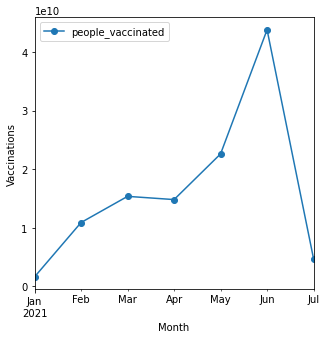

In [35]:
num_vaccinations_each_month.sort_index().plot.line(marker='o', xlabel="Month", ylabel="Vaccinations")

---

## 7. Quốc gia tiêm nhiều nhất tại mỗi tháng trong năm 2021?

Để trả lời cho câu hỏi này cần thực hiện những bước sau:
- Bước 1: Tìm những ngày có tiêm vaccine trong năm 2021.Rồi đổi index của bảng thành “date”.
- Bước 2: Từ kết quả ở trên, nhóm tiếp theo “Location” và resample theo tháng. Rồi chọn “Location” ở mỗi tháng mà có nhiều người tiêm vaccine nhất.
- Bước 3: Từ kết quả ở trên, vẽ đồ thị dạng line, trong đó trục hoành là năm và trục tung là số lượng người tiêm vaccine. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Đặt tên trục hoành là "Month" và tên trục tung là "Vaccinations".

In [36]:
national_vaccinated = national_vacc[['location', 'date', 'people_vaccinated']]
national_vaccinated_2021 = national_vaccinated[national_vaccinated['date'].dt.year == 2021]

national_vaccinations_each_month = national_vaccinated_2021.set_index('date').groupby('location').resample('M').sum()
national_vaccinations_each_month.reset_index(inplace=True)  

people_vaccinations_month_location = national_vaccinations_each_month.sort_values('people_vaccinated').drop_duplicates('date', keep='last')
max_national_vaccination_each_month = people_vaccinations_month_location.set_index('date')
max_national_vaccination_each_month

,location,people_vaccinated
date,,
2021-01-31,China,3.926926e+08
2021-07-31,China,1.866000e+09
2021-04-30,United States,3.747634e+09
2021-05-31,United States,4.874750e+09
2021-02-28,Colombia,7.464000e+09
2021-03-31,Colombia,7.487969e+09
2021-06-30,China,1.317601e+10


<AxesSubplot:xlabel='Month', ylabel='Vaccinations'>

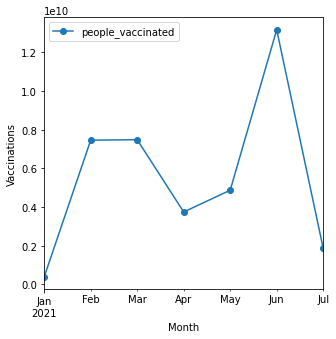

In [37]:
max_national_vaccination_each_month.sort_index().plot.line(marker='o', xlabel="Month", ylabel="Vaccinations")

**Trả lời:**
- Quốc gia tiêm nhiều trong tháng cho thấy quy trình tiêm chủng hiện đại, và khả năng cao sản xuất thay vì mua như Mĩ, Trung Quốc. Tiêm với quy mô lớn cũng cho thấy vaccine của nước này dùng là an toàn.

---

## 8. Quốc gia có số người chưa tiêm ít nhất?

Để trả lời cho câu hỏi này cần thực hiện những bước sau:
- Bước 1: Tìm những ngày có tiêm vaccine trong năm 2021. Rồi bỏ các “Location” trùng nhau và chỉ giữ lần có tỷ lệ tiêm cao nhất.
- Bước 2: Thêm cột “not_vaccinated” chứa số người chưa tiêm vaccine bằng công thức số người tiêm nhân (1 - tỷ lệ tiêm trên 100).
- Bước 3: Từ kết quả ở trên, vẽ đồ thị dạng World, trong đó mỗi “Location” đươc chia cách nhau bởi biên giới. Dùng màu sắc để tô các vị trí nằm trong top 20. Đặt tên tên bảng “Covid-19 Worldwide Least Less Vaccinated”.

In [38]:
national_vaccinated_2021 = national_vacc[national_vacc['date'].dt.year == 2021]

national_vaccinations = national_vaccinated_2021.sort_values('people_vaccinated_per_hundred').drop_duplicates('location', keep='last')

not_vaccinated_per_hundred = national_vaccinations[['location', 'date']]
not_vaccinated_per_hundred.insert(2, "not_vaccinated", (1 - (national_vaccinations['people_vaccinated_per_hundred'] / 100)) * national_vaccinations['people_vaccinated'])

top_20_vaccinated = not_vaccinated_per_hundred.sort_values('not_vaccinated').head(20)
top_20_vaccinated["not_vaccinated"] = top_20_vaccinated["not_vaccinated"].astype('int')

top_20_vaccinated

,location,date,not_vaccinated
10800,Gibraltar,2021-06-29,-6458
22272,Pitcairn,2021-06-15,0
9381,Falkland Islands,2021-04-14,642
18664,Montserrat,2021-06-25,1012
18672,Morocco,2021-02-04,1012
23431,Saint Helena,2021-04-24,1228
19252,Nauru,2021-06-29,2308
19256,Nepal,2021-01-29,2308
30330,Wallis and Futuna,2021-06-29,2712
28521,Tuvalu,2021-06-15,2840


In [39]:
country = list(top_20_vaccinated['location'])
total_not_vaccinated = list(top_20_vaccinated['not_vaccinated'])

list_not_vaccinated = [[country[i], total_not_vaccinated[i]] for i in range(len(country))]

not_vaccianted_world_map = Map(init_opts = opts.InitOpts(width = "900px", height = "460px"))
not_vaccianted_world_map.add("Total Not Vaccinated", list_not_vaccinated, maptype = 'world')

not_vaccianted_world_map.set_series_opts(label_opts = opts.LabelOpts(is_show = False))

not_vaccianted_world_map.set_global_opts(
    visualmap_opts = opts.VisualMapOpts(max_ = 1000000, is_piecewise = False),
    title_opts=opts.TitleOpts(
        title='Covid-19 Worldwide Least Less Vaccinated',
        subtitle='Till July 07th,2021',
        pos_left='center',
        padding=0,
        item_gap=2,
        title_textstyle_opts= opts.TextStyleOpts(
            color='darkblue',
            font_weight='bold',
            font_family='Courier New',
            font_size=30
        ), 
        subtitle_textstyle_opts= opts.TextStyleOpts(
            color='grey',
            font_weight='bold',
            font_family='Courier New',
            font_size=13
        )
    ),
    legend_opts = opts.LegendOpts(is_show = False),
)

not_vaccianted_world_map.render_notebook()

**Trả lời:**
- Do bệnh dịch lây rất nhanh nên số lượng người chưa chích ảnh hưởng rất lớn tới số người tử vong, cũng như xảy ra trường hợp những người chưa được chính tạo biến thể mới lây cho người đã được chính.

---

## 9. Tình hình tiêm vaccine tại Việt Nam theo tháng trong năm 2021?

Để trả lời cho câu hỏi này cần thực hiện những bước sau:
- Bước 1: Tìm những ngày có tiêm vaccine của Việt Nam. Rồi resample theo tháng và cột theo cột số người tiêm vaccine.
- Bước 2: Từ kết quả ở trên, vẽ đồ thị dạng line, trong đó trục hoành là năm và trục tung là số lượng người tiêm vaccine. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Đặt tên trục hoành là "Month" và tên trục tung là "Vaccinations".

In [40]:
vietnam_vacc = national_vacc[national_vacc['location'] == 'Vietnam'][['date', 'people_vaccinated']]

vietnam_vaccinations_each_month = vietnam_vacc.resample('M', on='date').sum()
vietnam_vaccinations_each_month

,people_vaccinated
date,
2021-03-31,649584.0
2021-04-30,4088782.0
2021-05-31,27435319.0
2021-06-30,59423248.0
2021-07-31,10886807.0


<AxesSubplot:xlabel='Month', ylabel='Vaccinations'>

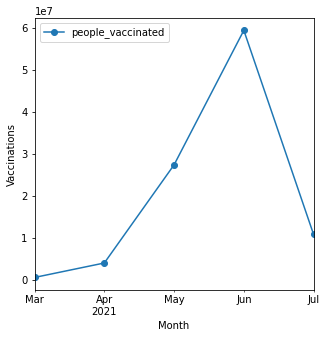

In [41]:
vietnam_vaccinations_each_month.sort_index().plot.line(marker='o', xlabel="Month", ylabel="Vaccinations")

**Trả lời:**
- Dữ liệu cho thấy tiêm vaccine ở Việt Nam đã bắt đầu từ tháng 3 và đạt đỉnh tại tháng 6 khi tình hình Covid-19 diễn biến phức tạp.

---


# Nhìn lại quá trình làm đồ án

### Trương Đại Triều

 - Đây là lần đầu tiên em tự trải nghiệm đầy đủ một quy trình khoa học dữ liệu. Quá trình chọn đề tài, và chọn bộ dataset phù hợp khá dài, và tham khảo nhiều nguồn khác nhau để có chọn một dataset thích hợp. Ở bộ dataset này, dữ liệu khá 'hỗn loạn', còn khuyết lượng giá trị lớn (40%), và do là bản gộp của nhiều dataset từ những nguồn khác, nên cần phải tiền xử lý nhiều lần để có thể sử dụng được. Vì mỗi quốc gia trong dataset bắt đầu thống kê và ngày thống kê gần nhất khác biệt nhau lớn, nên cần filter date nhiều lần, chọn ra 1 ngày đầy đủ các quốc gia nhất có thể. 
 - Hơn một nửa thời gian của đồ án được thực hiện từ khu cách ly tập trung F1, nên em cũng gặp nhiều xáo trộn, hoang mang, và thật khó tập trung suy nghĩ. 
 - Quá trình làm bài, em cảm thấy công việc của 1 Data Scientist thật thú vị, luôn tư duy và phân tích hướng dữ liệu, chỉ từ những bộ dataset thông thường, có thể phát hiện nhiều xu hướng, insight quan trọng về xã hội, thị trường. Từ những kết quả này có thể mang đi truyền đạt, thay dữ liệu 'kể câu chuyện' với nhà chức trách, chủ doanh nghiệp, và khách hàng.

### Nguyễn Hoàng Nam

- Đối với em project này này là một cơ hội lớn để thử sức bản thân với việc khám phá dữ liệu cũng như đề ra những câu hỏi đúng, khách quan và đem lại ý nghĩa thống kê. Đây đều là những kỹ năng rất cần thiết không chỉ trong ngành khoa học dữ liệu mà hiện diện trong tất cả chuyên ngành của ngành công nghệ thông tin. Đồ án không còn chỉ là kỹ năng cứng như lập trình mà còn là kỹ năng mềm như làm nhóm đặt câu hỏi, phân công và lên kế hoạch.
- Trong quá trình làm project những vấn đề như mô hình hoá, giải quyết conflict của file ipynb, lên ý tưởng và thực hiện đem lại những trải nghiệm rất chân thật. Và đối với em đó là một hành trang vững chắc để tiếp tục tiến tiếp trên con đường khoa học dữ liệu.
- Cuối cùng nhưng cũng không kém phần quan trọng là đồ án này có ý nghĩa rất lớn lao với nhóm em, vì đó có thể là đồ án nhóm cuối cùng được làm chung trước khi bắt đầu đợt thực tập cũng như đi làm. Nên có thể nói rằng những yêu cầu mà đồ án đề ra thật sự rất là khách quan và phù hợp, giống như một bài kiểm tra mà các doanh nghiệp dùng để xem khả năng giải quyết vấn đề của những nhân viên thực tập vậy.


---


# Tài liệu tham khảo

1. Tài liệu học tập môn Lập trình cho khoa học dữ liệu- thầy Trần Trung Kiên - HCMUS
2. https://docs.python.org/
3. https://pyecharts.readthedocs.io/projects/pyecharts-en/zh/latest/en-us/charts_configure/
4. https://ourworldindata.org/coronavirus
5. https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?most_recent_value_desc=false
6. https://github.com/owid/covid-19-data
7. https://www.programmersought.com/article/37775427410/
8. https://www.w3schools.com/python/
9. https://www.kaggle.com/statchaitya/country-to-continent
10. https://www.programmersought.com/article/51594092017/
